# S

## Extract Features

In [ ]:
# train 7, val 3

In [ ]:
import h5py

SAVE_FT_PATH = '/content/drive/MyDrive/Colab Notebooks/img_caption/ft_final.h5'

f = h5py.File(SAVE_FT_PATH, 'r')
len(f)

11000

In [ ]:
t = (1, 196, 2048)

for ele in f:
    if f[ele].shape != t:
        print(f[ele].shape)

In [ ]:
for ele in f:
    print(f[ele])

test

In [ ]:
# import json

# with open('/content/drive/MyDrive/Colab Notebooks/img_caption/train/flickr30k_images/trains.json', 'r') as json_file:
#     train_json = json.load(json_file)
# with open('/content/drive/MyDrive/Colab Notebooks/img_caption/train/flickr30k_images/vals.json', 'r') as json_file:
#     val_json = json.load(json_file)
# with open('/content/drive/MyDrive/Colab Notebooks/img_caption/train/flickr30k_images/tests.json', 'r') as json_file:
#     test_json = json.load(json_file)
# for ele in train_json['annotations']:
#     id = ele['image_id']
#     temp = f['%d_features' % int(id)]
#     # print(ele)
# for ele in val_json['annotations']:
#     id = ele['image_id']
#     temp = f['%d_features' % int(id)]
# for ele in test_json['annotations']:
#     id = ele['image_id']
#     temp = f['%d_features' % int(id)]

In [ ]:
# import os
# import h5py
# import torch
# from PIL import Image
# from skimage import io
# from tqdm import tqdm
# import torchvision.transforms as transforms
# SAVE_FT_PATH = '/content/drive/MyDrive/Colab Notebooks/img_caption/ft_test.h5'
# transform=transforms.Compose([
#                                 # transforms.Resize(256),
#                                 transforms.CenterCrop(224), 
#                                 transforms.ToTensor()
#                             ])

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = Resnet_50()
# model = model.to(device)
# # images is a tensor of dimensions (batch_size, 3, image_size, image_size)
# img_names = os.listdir(IMGS_PATH)[20000:21000]

# with h5py.File(SAVE_FT_PATH, 'w') as f:
#     for img_name in tqdm(img_names):
#         try:
#             image_id = img_name.split('.')[0]
#             path = os.path.join(IMGS_PATH, img_name)
#             img = io.imread(path)
#             img = transform(Image.fromarray(img))
#             img = torch.tensor(img)
#             img = img.unsqueeze(0).float().to(device)
#             output = model(img)
#             f['%d_features' % int(image_id)] = output.detach().cpu()
#         except: 
#             print(path)

## Dataset

In [ ]:
% cd '/content/drive/MyDrive/Colab Notebooks/img_caption/Image Captioning/meshed-memory-transformer'

!pip install -r requirements.txt
!pip uninstall thinc
!pip uninstall cymem
!pip install spacy
!python -m spacy download en

In [ ]:
% cd '/content/drive/MyDrive/Colab Notebooks/img_caption/Image Captioning/meshed-memory-transformer'
# model = torch.load(PATH,map_location= torch.device('cpu'))

!python test.py --batch_size 20 --workers 1 --features_path '/content/drive/MyDrive/Colab Notebooks/img_caption/ft.h5'\
                                            --index_path '/content/drive/MyDrive/Colab Notebooks/img_caption/index.pt' \
                                            --img_root '/content/drive/MyDrive/Colab Notebooks/img_caption/Flickr8k/Images' \
                                            --ann_root '/content/drive/MyDrive/Colab Notebooks/img_caption/Flickr8k/captions.txt'

/content/drive/.shortcut-targets-by-id/1ejeW5FQej_GXFefrrFxP1-Pn1IkJc441/Image Captioning/meshed-memory-transformer
Meshed-Memory Transformer Evaluation
Evaluation:   0% 0/200 [00:00<?, ?it/s]
lalal 0
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/content/drive/.shortcut-targets-by-id/1ejeW5FQej_GXFefrrFxP1-Pn1IkJc441/Image Captioning/meshed-memory-transformer/evaluation/cider/cider_scorer.py:70: RuntimeWarning: divide by zero encountered in log
  self.ref_len = np.log(float(len(self.crefs)))
{'BLEU': [0.0, 0.0, 0.0, 0.0], 'ROUGE': nan, 'CIDEr': nan}


## M2 Training

In [ ]:
% cd '/content/drive/MyDrive/Colab Notebooks/img_caption/Image Captioning/meshed-memory-transformer'
!python train.py --exp_name m2_transformer2 --batch_size 50 --m 40 --head 8 --warmup 10000 \
                 --features_path '/content/drive/MyDrive/Colab Notebooks/img_caption/ft_final.h5'\
                 --annotation_folder '/content/drive/MyDrive/Colab Notebooks/img_caption/train/flickr30k_images/'\ 
                #  --resume_last \

## M2 Evaluation

In [ ]:
% cd '/content/drive/MyDrive/Colab Notebooks/img_caption/Image Captioning/meshed-memory-transformer'
# model = torch.load(PATH,map_location= torch.device('cpu'))

!python test.py --batch_size 20 --workers 1 --features_path '/content/drive/MyDrive/Colab Notebooks/img_caption/index.pt'\
                                            --img_root '/content/drive/MyDrive/Colab Notebooks/img_caption/Flickr8k/Images' \
                                            --ann_root '/content/drive/MyDrive/Colab Notebooks/img_caption/Flickr8k/captions.txt'

/content/drive/.shortcut-targets-by-id/1ejeW5FQej_GXFefrrFxP1-Pn1IkJc441/Image Captioning/meshed-memory-transformer
Meshed-Memory Transformer Evaluation
Traceback (most recent call last):
  File "test.py", line 88, in <module>
    with open(args.index_path, 'rb') as f:
TypeError: expected str, bytes or os.PathLike object, not NoneType


In [ ]:
% cd '/content/drive/MyDrive/Colab Notebooks/img_caption/Image Captioning/meshed-memory-transformer'
%matplotlib

import random
from data import ImageDetectionsField, TextField, RawField
from data import Flickr, DataLoader
import evaluation
from models.transformer import Transformer, MemoryAugmentedEncoder, MeshedDecoder, ScaledDotProductAttentionMemory
import torch
from tqdm import tqdm
import argparse
import pickle
import numpy as np
# from matplotlib.pyplot import imshow 
# import matplotlib.pyplot as plt
# from IPython.display import HTML
# from PIL import Image
# from base64 import b64encode
# from IPython.display import display

random.seed(1234)
torch.manual_seed(1234)
np.random.seed(1234)


def predict_captions(model, dataloader, text_field):
    import itertools
    model.eval()
    gen = {}
    gts = {}
    with tqdm(desc='Evaluation', unit='it', total=len(dataloader)) as pbar:
        for it, (images, caps_gt) in enumerate(iter(dataloader)):
            images = images.to(device)
            with torch.no_grad():
                out, _ = model.beam_search(images, 20, text_field.vocab.stoi['<eos>'], 5, out_size=1)
            caps_gen = text_field.decode(out, join_words=False)
            # for img, cap in zip(images, caps_gen):
            #     # imshow(img.cpu().numpy())
            #     imshow(img.cpu().numpy())
            #     # HTML("<img src='data:image/png;base64,{0}'/>".format(b64encode(img.cpu().numpy()).decode('utf-8')))
            #     print('res:', cap)
            for i, (gts_i, gen_i) in enumerate(zip(caps_gt, caps_gen)):
                gen_i = ' '.join([k for k, g in itertools.groupby(gen_i)])
                gen['%d_%d' % (it, i)] = [gen_i.strip(), ]
                gts['%d_%d' % (it, i)] = gts_i
            pbar.update()

    gts = evaluation.PTBTokenizer.tokenize(gts)
    gen = evaluation.PTBTokenizer.tokenize(gen)
    scores, _ = evaluation.compute_scores(gts, gen)

    return scores


if __name__ == '__main__':
    device = torch.device('cuda')

    parser = argparse.ArgumentParser(description='Meshed-Memory Transformer')
    parser.add_argument('--batch_size', type=int, default=10)
    parser.add_argument('--workers', type=int, default=0)
    parser.add_argument('--features_path', type=str, default='/content/drive/MyDrive/Colab Notebooks/img_caption/ft_final.h5')
    parser.add_argument('--img_root', type=str, default='/content/drive/MyDrive/Colab Notebooks/img_caption/train/flickr30k_images/flickr30k_images')
    parser.add_argument('--ann_root', type=str, default='/content/drive/MyDrive/Colab Notebooks/img_caption/train/flickr30k_images/')
    parser.add_argument('-f')
    args = parser.parse_args()

    # '/content/drive/MyDrive/Colab Notebooks/img_caption/ft_final.h5'\
    #                                         --img_root '/content/drive/MyDrive/Colab Notebooks/img_caption/train/flickr30k_images/flickr30k_images'\
    #                                         --ann_root '/content/drive/MyDrive/Colab Notebooks/img_caption/train/flickr30k_images/'


    print('Meshed-Memory Transformer Evaluation')

    # Pipeline for image regions
    image_field = ImageDetectionsField(detections_path=args.features_path, max_detections=50, load_in_tmp=False)

    # Pipeline for text
    text_field = TextField(init_token='<bos>', eos_token='<eos>', lower=True, tokenize='spacy',
                           remove_punctuation=True, nopoints=False)

    # Create the dataset
    dataset = Flickr(image_field, text_field, args.img_root, args.ann_root)
    _, _, test_dataset = dataset.splits
    text_field.vocab = pickle.load(open('vocab_m2_transformer.pkl', 'rb'))

    # Model and dataloaders
    encoder = MemoryAugmentedEncoder(3, 0, attention_module=ScaledDotProductAttentionMemory,
                                     attention_module_kwargs={'m': 40})
    decoder = MeshedDecoder(len(text_field.vocab), 100, 3, text_field.vocab.stoi['<pad>'])
    model = Transformer(text_field.vocab.stoi['<bos>'], encoder, decoder).to(device)

    data = torch.load('saved_models/m2_transformer_temp.pth')
    model.load_state_dict(data['state_dict'])

    dict_dataset_test = test_dataset.image_dictionary({'image': image_field, 'text': RawField()})
    dict_dataloader_test = DataLoader(dict_dataset_test, batch_size=args.batch_size, num_workers=args.workers)

    scores = predict_captions(model, dict_dataloader_test, text_field)
    print(scores)


## M2 Testing

In [ ]:
import torch
from torchvision.models import resnet50
from torch import nn
import torch.nn.functional as F
import torchvision.models as models

class Resnet_50(nn.Module):
   """
   Resnet50 class extractes regions feature   
   """

   def __init__(self, encoded_image_size=14, embed_dim=512):
       super(Resnet_50, self).__init__()
       self.embed_dim = embed_dim
       #self.decoder_dim = decoder_dim

       resnet = resnet50(pretrained=True)
       self.resnet_fc = resnet50(pretrained=True)

       # Remove linear and pool layers (since we're not doing classification)
       modules = list(resnet.children())[:-2]
       self.resnet = nn.Sequential(*modules)

       # Resize image to fixed size to allow input images of variable size
       self.adaptive_pool = nn.AdaptiveAvgPool2d((encoded_image_size, encoded_image_size))

       # Fine Tuning
       self.fine_tune()

   def forward(self, images):
       """
       Forward propagation.
       :param images: images, a tensor of dimensions (batch_size, 3, image_size, image_size)
       :return: encoded images
       """

       # output of FC
       out = self.resnet(images)  # (batch_size, 2048, image_size/32, image_size/32)
       out = self.adaptive_pool(out)  # (batch_size, 2048, encoded_image_size, encoded_image_size)
      
       # FOR MESHED MEMORY
       out = torch.flatten(out, start_dim=2, end_dim=3) # (batch_size,  2048, encoded_image_size**2)
       out = out.permute(0, 2, 1) # (batch_size, encoded_image_size ** 2, 2048)

       return out 
  
   def fine_tune(self, fine_tune=False):
       """
       Allow or prevent the computation of gradients for convolutional blocks 2 to 4 of the encoder.
       :param fine_tune: Allow?
       """
       for p in self.resnet.parameters():
           p.requires_grad = False
       # If fine-tuning, only fine-tune convolutional blocks 2 through 4
       for c in list(self.resnet.children())[5:]:
           for p in c.parameters():
               p.requires_grad = fine_tune

In [ ]:
import os
import h5py
import torch
from PIL import Image
from skimage import io
from tqdm import tqdm
import torchvision.transforms as transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn_model = Resnet_50()
cnn_model = cnn_model.to(device)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
% cd '/content/drive/MyDrive/Colab Notebooks/img_caption/Image Captioning/meshed-memory-transformer'

import random
from data import ImageDetectionsField, TextField, RawField
from data import COCO, DataLoader
import evaluation
from models.transformer import Transformer, MemoryAugmentedEncoder, MeshedDecoder, ScaledDotProductAttentionMemory
import torch
from tqdm import tqdm
import argparse
import pickle
import numpy as np
from google.colab.patches import cv2_imshow
import os
import h5py
import torch
from PIL import Image
from skimage import io
from tqdm import tqdm
import cv2
import torchvision.transforms as transforms

transform=transforms.Compose([
                                # transforms.Resize(256),
                                transforms.CenterCrop(224), 
                                transforms.ToTensor()
                            ])

random.seed(1234)
torch.manual_seed(1234)
np.random.seed(1234)

device = torch.device('cuda')

def predict_caption(model, image_ft, text_field):
    model.eval()
    image_ft = image_ft.to(device)
    with torch.no_grad():
        out, _ = model.beam_search(image_ft, 20, text_field.vocab.stoi['<eos>'], 5, out_size=1)
    caps_gen = text_field.decode(out, join_words=False)
    return caps_gen


# device = torch.device('cuda')

# Pipeline for image regions
# image_field = ImageDetectionsField(detections_path=args.features_path, max_detections=50, load_in_tmp=False)

# Pipeline for text
text_field = TextField(init_token='<bos>', eos_token='<eos>', lower=True, tokenize='spacy',
                        remove_punctuation=True, nopoints=False)
# text_field.vocab = pickle.load(open('vocab_m2_transformer.pkl', 'rb'))
text_field.vocab = pickle.load(open('vocab.pkl', 'rb'))

# Model and dataloaders
encoder = MemoryAugmentedEncoder(3, 0, attention_module=ScaledDotProductAttentionMemory,
                                    attention_module_kwargs={'m': 40})
decoder = MeshedDecoder(len(text_field.vocab), 54, 3, text_field.vocab.stoi['<pad>'])
model = Transformer(text_field.vocab.stoi['<bos>'], encoder, decoder).to(device)

data = torch.load('meshed_memory_transformer.pth')
# data = torch.load('saved_models/m2_transformer_temp.pth')
model.load_state_dict(data['state_dict'])

test_path = '/content/drive/MyDrive/Colab Notebooks/img_caption/Image Captioning/test_imgs'
image_names = os.listdir(test_path)

for image_name in image_names:
    # feature extraction
    image = cv2.imread(os.path.join(test_path, image_name))
    img = transform(Image.fromarray(image))
    img = torch.tensor(img)
    img = img.unsqueeze(0).float().to(device)
    ft_output = cnn_model(img).detach().cpu()
    print(ft_output.shape)

    # img captioning
    cap = predict_caption(model, ft_output, text_field)
    # image = cv2.imread(os.path.join(test_path, image_name))
    cv2_imshow(image)
    print(cap)

# M2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
% cd '/content/drive/MyDrive/Colab Notebooks/img_caption/Image Captioning/meshed-memory-transformer'

!pip install -r requirements.txt
!pip uninstall thinc
!pip uninstall cymem
!pip install spacy
!python -m spacy download en

/content/drive/.shortcut-targets-by-id/1ejeW5FQej_GXFefrrFxP1-Pn1IkJc441/Image Captioning/meshed-memory-transformer
     |████████████████████████████████| 112kB 6.7MB/s 
     |████████████████████████████████| 450kB 21.7MB/s 
     |████████████████████████████████| 829kB 27.0MB/s 
     |████████████████████████████████| 2.4MB 37.2MB/s 
     |████████████████████████████████| 2.8MB 36.2MB/s 
     |████████████████████████████████| 92kB 11.0MB/s 
     |████████████████████████████████| 92kB 13.1MB/s 
     |████████████████████████████████| 12.6MB 239kB/s 
     |████████████████████████████████| 245kB 51.3MB/s 
     |████████████████████████████████| 1.6MB 40.8MB/s 
     |████████████████████████████████| 17.3MB 121kB/s 
     |████████████████████████████████| 163kB 55.3MB/s 
     |████████████████████████████████| 2.1MB 32.4MB/s 
     |████████████████████████████████| 112kB 59.6MB/s 
     |████████████████████████████████| 71kB 12.3MB/s 
     |████████████████████████████████| 81kB 11.

Uninstalling thinc-7.4.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/thinc-7.4.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/thinc/*
Proceed (y/n)? y
  Successfully uninstalled thinc-7.4.0
Uninstalling cymem-1.31.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cymem-1.31.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/cymem/*
Proceed (y/n)? y
  Successfully uninstalled cymem-1.31.2
     |████████████████████████████████| 81kB 5.5MB/s 
     |████████████████████████████████| 133kB 45.6MB/s 
     |████████████████████████████████| 2.2MB 47.4MB/s 
  Found existing installation: tqdm 4.32.2
    Uninstalling tqdm-4.32.2:
      Successfully uninstalled tqdm-4.32.2
  Found existing installation: preshed 1.0.1
    Uninstalling preshed-1.0.1:
      Successfully uninstalled preshed-1.0.1
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en

In [ ]:
img_path = '/content/drive/MyDrive/Colab\ Notebooks/img_caption/Image\ Captioning/test_imgs/test2.png'

% cd '/content/drive/MyDrive/Colab Notebooks/img_caption/Faster-R-CNN-with-model-pretrained-on-Visual-Genome'
!python demo.py --net res101 \
                --dataset vg\
                --image_dir $img_path \
                --load_dir '/content/drive/MyDrive/Colab Notebooks/img_caption/Faster-R-CNN-with-model-pretrained-on-Visual-Genome/'

/content/drive/MyDrive/Colab Notebooks/img_caption/Faster-R-CNN-with-model-pretrained-on-Visual-Genome
Called with args:
Namespace(cfg_file='cfgs/res101.yml', class_agnostic=False, classes_dir='data/genome/1600-400-20', cuda=False, dataset='vg', image_dir='/content/drive/MyDrive/Colab Notebooks/img_caption/Image Captioning/test_imgs/test2.png', image_file='img1.jpg', load_dir='/content/drive/MyDrive/Colab Notebooks/img_caption/Faster-R-CNN-with-model-pretrained-on-Visual-Genome/', mGPUs=False, net='res101', parallel_type=0, set_cfgs=None, vis=False)
Using config:
{'ANCHOR_RATIOS': [0.5, 1, 2],
 'ANCHOR_SCALES': [4, 8, 16, 32],
 'CROP_RESIZE_WITH_MAX_POOL': False,
 'CUDA': False,
 'DATA_DIR': '/content/drive/MyDrive/Colab '
             'Notebooks/img_caption/Faster-R-CNN-with-model-pretrained-on-Visual-Genome/data',
 'DEDUP_BOXES': 0.0625,
 'EPS': 1e-14,
 'EXP_DIR': 'res101',
 'FEAT_STRIDE': [16],
 'GPU_ID': 0,
 'MATLAB': 'matlab',
 'MAX_NUM_GT_BOXES': 20,
 'MOBILENET': {'DEPTH_MULTIPL

/content/drive/.shortcut-targets-by-id/1ejeW5FQej_GXFefrrFxP1-Pn1IkJc441/Image Captioning/meshed-memory-transformer
torch.Size([1, 15, 2048])


/content/drive/.shortcut-targets-by-id/1ejeW5FQej_GXFefrrFxP1-Pn1IkJc441/Image Captioning/meshed-memory-transformer/models/transformer/attention.py:62: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/cuda/LegacyDefinitions.cpp:28.)
  att = att.masked_fill(attention_mask, -np.inf)


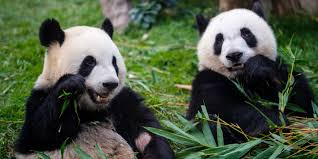

[['a', 'group', 'of', 'black', 'and', 'white', 'animals', 'in', 'the', 'grass']]


In [ ]:
% cd '/content/drive/MyDrive/Colab Notebooks/img_caption/Image Captioning/meshed-memory-transformer'

import random
from data import ImageDetectionsField, TextField, RawField
from data import COCO, DataLoader
import evaluation
from models.transformer import Transformer, MemoryAugmentedEncoder, MeshedDecoder, ScaledDotProductAttentionMemory
import torch
from tqdm import tqdm
import argparse
import pickle
import numpy as np
from google.colab.patches import cv2_imshow
import os
import h5py
import torch
from PIL import Image
from skimage import io
from tqdm import tqdm
import cv2


def predict_caption(model, image_ft, text_field):
    model.eval()
    image_ft = image_ft.to(device)
    with torch.no_grad():
        out, _ = model.beam_search(image_ft, 20, text_field.vocab.stoi['<eos>'], 5, out_size=1)
    caps_gen = text_field.decode(out, join_words=False)
    return caps_gen


device = torch.device('cuda')

# Pipeline for image regions
# image_field = ImageDetectionsField(detections_path=args.features_path, max_detections=50, load_in_tmp=False)

# Pipeline for text
text_field = TextField(init_token='<bos>', eos_token='<eos>', lower=True, tokenize='spacy',
                        remove_punctuation=True, nopoints=False)
# text_field.vocab = pickle.load(open('vocab_m2_transformer.pkl', 'rb'))
text_field.vocab = pickle.load(open('vocab.pkl', 'rb'))

# Model and dataloaders
encoder = MemoryAugmentedEncoder(3, 0, attention_module=ScaledDotProductAttentionMemory,
                                    attention_module_kwargs={'m': 40})
decoder = MeshedDecoder(len(text_field.vocab), 54, 3, text_field.vocab.stoi['<pad>'])
model = Transformer(text_field.vocab.stoi['<bos>'], encoder, decoder).to(device)

data = torch.load('meshed_memory_transformer.pth')
# data = torch.load('saved_models/m2_transformer_temp.pth')
model.load_state_dict(data['state_dict'])

# feature extraction
with open('/content/drive/MyDrive/Colab Notebooks/img_caption/ft.pkl', 'rb') as f:
    ft_output = pickle.load(f)
    ft_output = ft_output.unsqueeze(0)
print(ft_output.shape)
# img captioning
cap = predict_caption(model, ft_output, text_field)
image = cv2.imread(img_path)
cv2_imshow(image)
print(cap)